<a href="https://colab.research.google.com/github/touseefshoonya/Ada-Boosting/blob/main/Object_classification_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf

In [5]:
%pwd

'/content'

In [6]:
import keras

In [ ]:
%pwd

'/content'

In [7]:
%cd /content/drive/MyDrive/Small sample for object classification

/content/drive/MyDrive/Small sample for object classification


In [8]:
%pwd

'/content/drive/MyDrive/Small sample for object classification'

In [9]:
%ls

Train/  Validation/


In [10]:
# Import packages

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [11]:
#set constant

IMAGE_SIZE = [224,224]

train_path = "Train"
valid_path = "Validation"

In [12]:
IMAGE_SIZE + [3]

[224, 224, 3]

In [13]:
# Donwload vgg16 pretrained model

vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
for layer in vgg16.layers:
  print(layer)

In [15]:
for layer in vgg16.layers:
  layer.trainable = False

In [16]:
for layer in vgg16.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [17]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
folder = glob("Train/*")

In [19]:
folder

['Train/Cat', 'Train/Dog']

In [20]:
len(folder)

2

In [21]:
# Adding our custom dense layers

model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [23]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ['accuracy']
)

In [24]:
## data transformation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True

)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# loading train images

training_set = train_datagen.flow_from_directory(
    "Train",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 140 images belonging to 2 classes.


In [26]:
# lodaing test images

test_set = test_datagen.flow_from_directory(
    "Validation",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 82 images belonging to 2 classes.


In [27]:
history = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)

)

Epoch 1/50
5/5 [==============================] - 139s 28s/step - loss: 4.6293 - accuracy: 0.5071 - val_loss: 4.5658 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 122s 26s/step - loss: 2.1384 - accuracy: 0.5929 - val_loss: 1.1353 - val_accuracy: 0.6341
Epoch 3/50
5/5 [==============================] - 162s 35s/step - loss: 0.4800 - accuracy: 0.8429 - val_loss: 0.9307 - val_accuracy: 0.7561
Epoch 4/50
5/5 [==============================] - 161s 36s/step - loss: 0.9596 - accuracy: 0.7857 - val_loss: 0.7837 - val_accuracy: 0.7317
Epoch 5/50
5/5 [==============================] - 124s 26s/step - loss: 0.2805 - accuracy: 0.9214 - val_loss: 1.1090 - val_accuracy: 0.7439
Epoch 6/50
5/5 [==============================] - 123s 29s/step - loss: 0.3325 - accuracy: 0.9000 - val_loss: 0.7044 - val_accuracy: 0.7683
Epoch 7/50
5/5 [==============================] - 125s 26s/step - loss: 0.2815 - accuracy: 0.9286 - val_loss: 0.4959 - val_accuracy: 0.8537
Epoch 8/50
5/5 [====

In [28]:
history.history

{'loss': [4.629331588745117,
  2.138385772705078,
  0.4799683690071106,
  0.9595988392829895,
  0.2805442214012146,
  0.3325006067752838,
  0.2814541459083557,
  0.13209299743175507,
  0.07416871935129166,
  0.0813877210021019,
  0.03689148277044296,
  0.03125389292836189,
  0.01050364039838314,
  0.017636427655816078,
  0.012909813784062862,
  0.01418344583362341,
  0.009862936101853848,
  0.011022251099348068,
  0.01318293809890747,
  0.0143775325268507,
  0.014189169742166996,
  0.009355788119137287,
  0.005398488137871027,
  0.007450257893651724,
  0.004746124614030123,
  0.01067921333014965,
  0.004599762614816427,
  0.005767392460256815,
  0.003939976915717125,
  0.005396364722400904,
  0.0034882165491580963,
  0.0037782613653689623,
  0.004832696635276079,
  0.0026858120691031218,
  0.004489886108785868,
  0.0037153312005102634,
  0.004351262003183365,
  0.0038936010096222162,
  0.004782062955200672,
  0.0027727566193789244,
  0.0028113811276853085,
  0.002661213744431734,
  0.0

In [29]:
import matplotlib.pyplot as plt

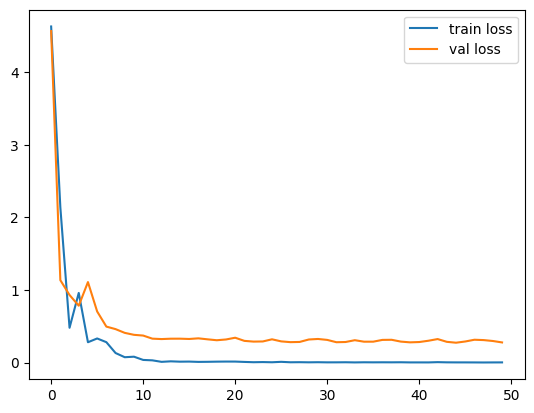

<Figure size 640x480 with 0 Axes>

In [30]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig("Loss graph")

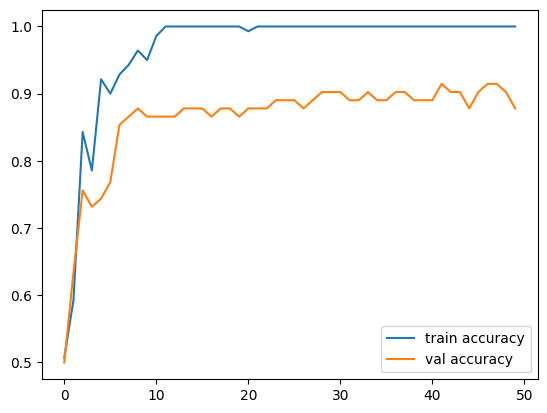

<Figure size 640x480 with 0 Axes>

In [31]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig("accuracy graph")

In [32]:
## Save model
model.save("model_vgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
# load model

from tensorflow.keras.models import load_model

model=load_model('model_vgg16.h5')

In [34]:
y_pred = model.predict(test_set)

3/3 [==============================] - 53s 14s/step


In [35]:
y_pred

array([[5.44262621e-05, 9.99945462e-01],
       [7.50882272e-03, 9.92491245e-01],
       [1.08663827e-01, 8.91336143e-01],
       [9.98058498e-01, 1.94145739e-03],
       [6.89585931e-07, 9.99999225e-01],
       [4.70214644e-07, 9.99999464e-01],
       [9.99156177e-01, 8.43712420e-04],
       [1.47678225e-08, 9.99999940e-01],
       [1.98247551e-04, 9.99801874e-01],
       [9.38930094e-01, 6.10698797e-02],
       [9.84682858e-01, 1.53171467e-02],
       [8.58185388e-07, 9.99999106e-01],
       [9.14173007e-01, 8.58269781e-02],
       [7.66174138e-01, 2.33825848e-01],
       [9.99998868e-01, 1.10119618e-06],
       [9.94024336e-01, 5.97568601e-03],
       [5.90266846e-02, 9.40973401e-01],
       [9.80184078e-01, 1.98159125e-02],
       [7.65436471e-01, 2.34563515e-01],
       [5.20710319e-06, 9.99994695e-01],
       [6.37195408e-05, 9.99936163e-01],
       [6.63116872e-02, 9.33688343e-01],
       [9.98628318e-01, 1.37160823e-03],
       [4.68652649e-03, 9.95313406e-01],
       [1.115680

In [36]:
y_pred = np.argmax(y_pred, axis = 1)

In [37]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [72]:
%ls

'accuracy graph.png'  'Screenshot 2024-05-11 001015.jpg'   Train/
'Loss graph.png'      'Screenshot 2024-05-11 001053.jpg'   Validation/
 model_vgg16.h5       'Screenshot 2024-05-11 003052.jpg'


In [73]:
## load test image

image_name = "Screenshot 2024-05-11 003052.jpg"

In [74]:
img = image.load_img(image_name, target_size=(224,224))

In [75]:
x=image.img_to_array(img)
x

array([[[251., 252., 255.],
        [254., 254., 255.],
        [255., 255., 255.],
        ...,
        [255., 252., 253.],
        [255., 254., 255.],
        [255., 253., 255.]],

       [[254., 255., 255.],
        [255., 255., 255.],
        [255., 255., 253.],
        ...,
        [255., 254., 255.],
        [251., 249., 250.],
        [255., 254., 255.]],

       [[255., 255., 255.],
        [255., 253., 254.],
        [254., 253., 251.],
        ...,
        [255., 255., 253.],
        [255., 255., 253.],
        [254., 254., 254.]],

       ...,

       [[246., 244., 255.],
        [139., 178.,  85.],
        [138., 193.,  65.],
        ...,
        [149., 196.,  66.],
        [155., 190.,  96.],
        [242., 244., 243.]],

       [[245., 243., 255.],
        [140., 179.,  96.],
        [140., 194.,  74.],
        ...,
        [141., 192.,  51.],
        [153., 191.,  92.],
        [240., 241., 243.]],

       [[241., 239., 253.],
        [143., 181., 104.],
        [145., 1

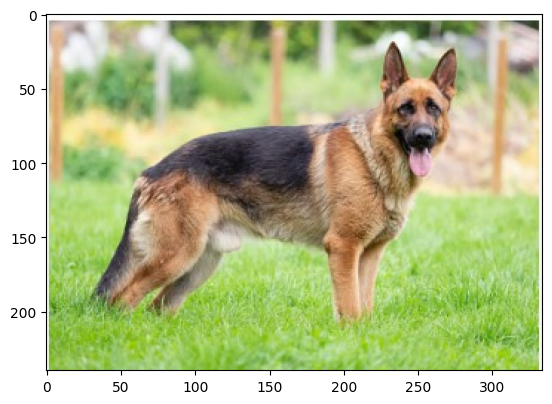

In [76]:
Z = plt.imread(image_name)
plt.imshow(Z)

In [77]:
x.shape

(224, 224, 3)

In [78]:
x=x/255

In [63]:
from keras.applications.vgg16 import preprocess_input

In [79]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [80]:
model.predict(img_data)

1/1 [==============================] - 1s 544ms/step


array([[9.9999988e-01, 9.6401756e-08]], dtype=float32)

In [81]:
result = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 485ms/step


In [82]:
result

array([0])

In [83]:
if result[0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat
